Создала и настроила venv и ядро подключила

Научилась распаковывать архивы(пока не поняно, зачем)

То, что в клетке ниже не получилось распаковать - какие-то бракованные люди

In [175]:
import rarfile
import re
import shutil
import os
import glob
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import phik
import networkx as nx

In [ ]:
rar_path = '/Users/dana/Desktop/вшэ/2 курс/курсач/данные/TimeCourses.rar'
extract_to = '/Users/dana/Desktop/вшэ/2 курс/курсач/данные'
extracted_folder = '/Users/dana/Desktop/вшэ/2 курс/курсач/данные/TimeCourses'

# Если папка уже существует, удаляем её
if os.path.exists(extracted_folder):
    shutil.rmtree(extracted_folder)

with rarfile.RarFile(rar_path) as rf:
    rf.extractall(path=extract_to)

print(f"Файлы извлечены в {extract_to}")

BadRarFile: Corrupt file - CRC check failed: TimeCourses/sub-OAS30762/sub-OAS30762_run1_timecourses.mat - exp=2587894035 got=21064832

Составим список названий столбцов, который будем прикреплять к таблицам:

In [164]:
labels_path = "/Users/dana/Desktop/вшэ/2 курс/курсач/данные/aal_labels.rtf"

with open(labels_path, "r", encoding="utf-8") as file:
    text = file.read()

matches = re.findall(r"(\d+)\s+([\w\d_]+)\s+\1", text)
column_names = [match[1] for match in matches]

print([(i+1, column_names[i]) for i in range(len(column_names))])
print(f"Количество областей мозга: {len(column_names)}")

[(1, 'Precentral_L'), (2, 'Precentral_R'), (3, 'Frontal_Sup_2_L'), (4, 'Frontal_Sup_2_R'), (5, 'Frontal_Mid_2_L'), (6, 'Frontal_Mid_2_R'), (7, 'Frontal_Inf_Oper_L'), (8, 'Frontal_Inf_Oper_R'), (9, 'Frontal_Inf_Tri_L'), (10, 'Frontal_Inf_Tri_R'), (11, 'Frontal_Inf_Orb_2_L'), (12, 'Frontal_Inf_Orb_2_R'), (13, 'Rolandic_Oper_L'), (14, 'Rolandic_Oper_R'), (15, 'Supp_Motor_Area_L'), (16, 'Supp_Motor_Area_R'), (17, 'Olfactory_L'), (18, 'Olfactory_R'), (19, 'Frontal_Sup_Medial_L'), (20, 'Frontal_Sup_Medial_R'), (21, 'Frontal_Med_Orb_L'), (22, 'Frontal_Med_Orb_R'), (23, 'Rectus_L'), (24, 'Rectus_R'), (25, 'OFCmed_L'), (26, 'OFCmed_R'), (27, 'OFCant_L'), (28, 'OFCant_R'), (29, 'OFCpost_L'), (30, 'OFCpost_R'), (31, 'OFClat_L'), (32, 'OFClat_R'), (33, 'Insula_L'), (34, 'Insula_R'), (35, 'Cingulate_Mid_L'), (36, 'Cingulate_Mid_R'), (37, 'Cingulate_Post_L'), (38, 'Cingulate_Post_R'), (39, 'Hippocampus_L'), (40, 'Hippocampus_R'), (41, 'ParaHippocampal_L'), (42, 'ParaHippocampal_R'), (43, 'Amygdala_L

Для каждого человека

1) объединяем 2 файла с временными рядами

2) строим таблицу корреляций и сохраняем ее

In [ ]:
# Корневая директория с папками person_n
root_dir = "/Users/dana/Desktop/вшэ/2 курс/курсач/данные/TimeCourses"

# Получаем список всех папок вида /data/person_n/
person_dirs = [d for d in sorted(os.listdir(root_dir)) if os.path.isdir(os.path.join(root_dir, d))]

for person in person_dirs:
    person_path = os.path.join(root_dir, person)
    output_file = os.path.join(person_path, "full_data.csv")
    corr_matrix_file = os.path.join(person_path, "correlation_matrix.csv") 

    if os.path.exists(output_file) and os.path.exists(corr_matrix_file):
        print(f"Пропускаем {person}, файлы уже существуют.")
        continue

    # Ищем все CSV-файлы в папке person_n
    csv_files = sorted(glob.glob(os.path.join(person_path, "*.csv")))  # Сортируем по алфавиту
    if not csv_files:
        continue

    # Загружаем и объединяем все CSV-файлы, подписываем слолбцы и сохраняем
    df_list = [pd.read_csv(file, header=None) for file in csv_files]
    df = pd.concat(df_list, ignore_index=True)
    df.columns = column_names
    df.to_csv(output_file, index=False)
    print(f"Объединенный файл сохранен: {output_file}") 

    # Строим матрицу корреляций
    corr_matrix = df.corr()
    corr_matrix.to_csv(corr_matrix_file)
    print(f"Матрица корреляций сохранена: {corr_matrix_file}")


(328, 166)
Объединенный файл сохранен: /Users/dana/Desktop/вшэ/2 курс/курсач/данные/TimeCourses/sub-OAS30001/full_data.csv
Матрица корреляций сохранена: /Users/dana/Desktop/вшэ/2 курс/курсач/данные/TimeCourses/sub-OAS30001/correlation_matrix.csv
(328, 166)
Объединенный файл сохранен: /Users/dana/Desktop/вшэ/2 курс/курсач/данные/TimeCourses/sub-OAS30002/full_data.csv
Матрица корреляций сохранена: /Users/dana/Desktop/вшэ/2 курс/курсач/данные/TimeCourses/sub-OAS30002/correlation_matrix.csv
(328, 166)
Объединенный файл сохранен: /Users/dana/Desktop/вшэ/2 курс/курсач/данные/TimeCourses/sub-OAS30003/full_data.csv
Матрица корреляций сохранена: /Users/dana/Desktop/вшэ/2 курс/курсач/данные/TimeCourses/sub-OAS30003/correlation_matrix.csv
(328, 166)
Объединенный файл сохранен: /Users/dana/Desktop/вшэ/2 курс/курсач/данные/TimeCourses/sub-OAS30004/full_data.csv
Матрица корреляций сохранена: /Users/dana/Desktop/вшэ/2 курс/курсач/данные/TimeCourses/sub-OAS30004/correlation_matrix.csv
(328, 166)
Объед

Посмотрим, как выглядит матрица корреляций для 1 человека

In [181]:
#лк-ад версия таблицы

df = pd.read_csv("/Users/dana/Desktop/вшэ/2 курс/курсач/данные/TimeCourses/sub-OAS30001/correlation_matrix.csv")
ph = df.phik_matrix(njobs=1)

plt.figure(figsize=(166,166))
# sns.heatmap(ph, cmap="Blues", annot=True)
sns.heatmap(ph, cmap="coolwarm", linewidths=0.5)

interval columns not set, guessing: ['Precentral_L', 'Precentral_R', 'Frontal_Sup_2_L', 'Frontal_Sup_2_R', 'Frontal_Mid_2_L', 'Frontal_Mid_2_R', 'Frontal_Inf_Oper_L', 'Frontal_Inf_Oper_R', 'Frontal_Inf_Tri_L', 'Frontal_Inf_Tri_R', 'Frontal_Inf_Orb_2_L', 'Frontal_Inf_Orb_2_R', 'Rolandic_Oper_L', 'Rolandic_Oper_R', 'Supp_Motor_Area_L', 'Supp_Motor_Area_R', 'Olfactory_L', 'Olfactory_R', 'Frontal_Sup_Medial_L', 'Frontal_Sup_Medial_R', 'Frontal_Med_Orb_L', 'Frontal_Med_Orb_R', 'Rectus_L', 'Rectus_R', 'OFCmed_L', 'OFCmed_R', 'OFCant_L', 'OFCant_R', 'OFCpost_L', 'OFCpost_R', 'OFClat_L', 'OFClat_R', 'Insula_L', 'Insula_R', 'Cingulate_Mid_L', 'Cingulate_Mid_R', 'Cingulate_Post_L', 'Cingulate_Post_R', 'Hippocampus_L', 'Hippocampus_R', 'ParaHippocampal_L', 'ParaHippocampal_R', 'Amygdala_L', 'Amygdala_R', 'Calcarine_L', 'Calcarine_R', 'Cuneus_L', 'Cuneus_R', 'Lingual_L', 'Lingual_R', 'Occipital_Sup_L', 'Occipital_Sup_R', 'Occipital_Mid_L', 'Occipital_Mid_R', 'Occipital_Inf_L', 'Occipital_Inf_R', '

<Axes: >

Напишем функцию для создания графов по матрицам корреляций

In [182]:
def build_mst_graph(corr_matrix_file, density_target=0.05):
    df_corr = pd.read_csv(corr_matrix_file, index_col=0)
    N = df_corr.shape[0]
    node_labels = list(df_corr.index)

    G = nx.Graph()

    for i in range(N):
        for j in range(i + 1, N):
            w = abs(df_corr.iloc[i, j])
            G.add_edge(node_labels[i], node_labels[j], weight=w)


    # Создаем MST (остовное дерево)
    mst_edges = list(nx.minimum_spanning_edges(G, algorithm="kruskal", data=True))


    # Ограничиваем плотность графа
    E_max = int(density_target * N * (N - 1) / 2)
    sorted_edges = sorted(G.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)
    final_edges = [(u, v, data['weight']) for u, v, data in mst_edges]

    for u, v, data in sorted_edges:
        if len(final_edges) >= E_max:
            break
        final_edges.append((u, v, data['weight']))
    

    G_final = nx.Graph()
    G_final.add_weighted_edges_from(final_edges)

    return G_final

Визуализируем граф (так же для 1 человека)

In [185]:
graph = build_mst_graph("/Users/dana/Desktop/вшэ/2 курс/курсач/данные/TimeCourses/sub-OAS30001/correlation_matrix.csv")
print(f"Число рёбер в графе: {graph.number_of_edges()}")
print(f"Названия вершин: {list(graph.nodes)[:5]}")

Число рёбер в графе: 684
Названия вершин: ['Frontal_Inf_Tri_L', 'Olfactory_R', 'Frontal_Inf_Orb_2_R', 'Raphe_D', 'OFCpost_L']


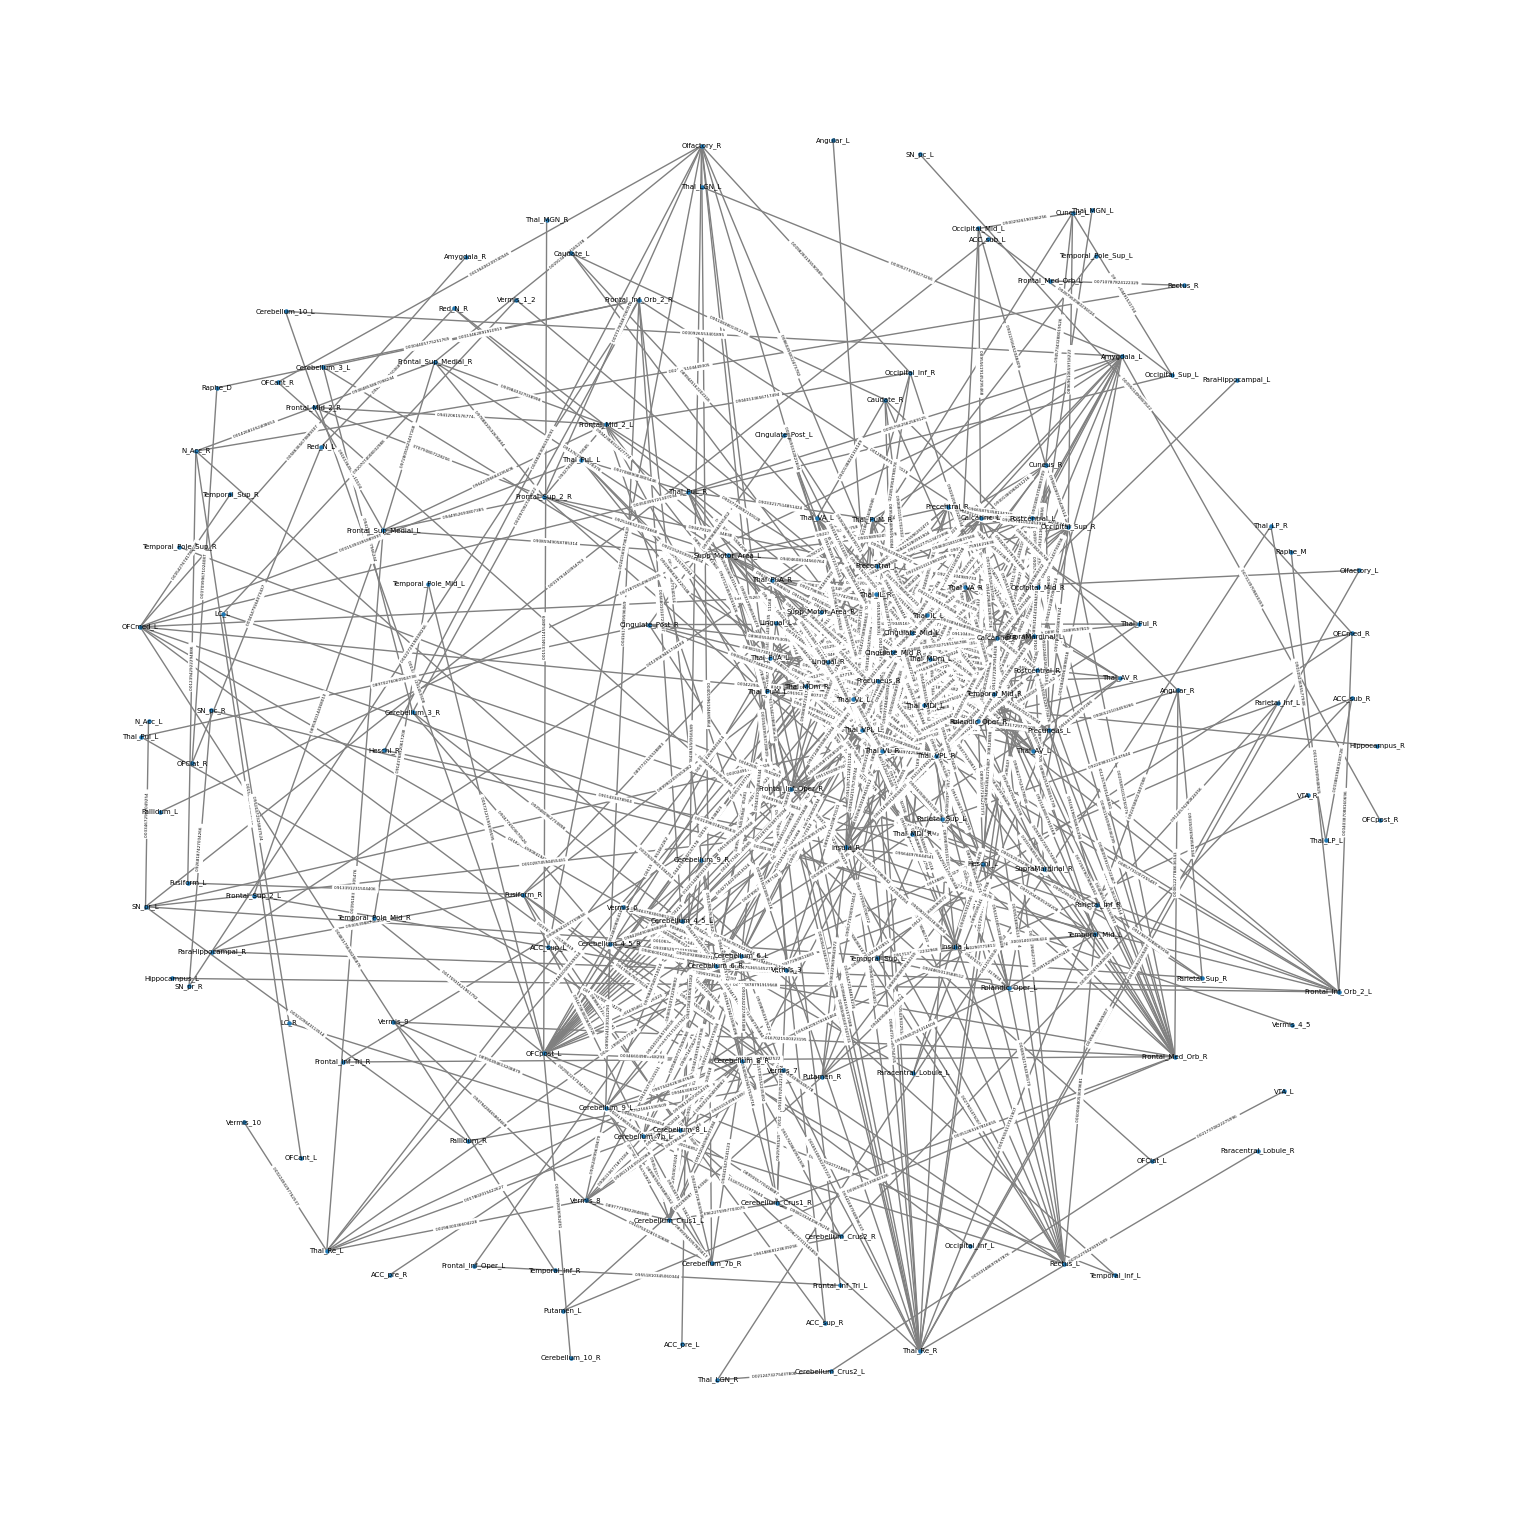

In [186]:
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(graph, weight='weight', k=0.5)
edge_labels = nx.get_edge_attributes(graph, 'weight')
nx.draw(graph, pos, with_labels=True, node_size=5, edge_color="gray", font_size=5)
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=3)
plt.show()

In [207]:
import shutil
from nilearn import datasets

# Удаляем директорию с данными
data_dir = "/Users/dana/nilearn_data/schaefer_2018"
shutil.rmtree(data_dir, ignore_errors=True)

# Загрузка Schaefer Atlas (200 областей)
schaefer = datasets.fetch_atlas_schaefer_2018(n_rois=200, data_dir="/Users/dana/nilearn_data", resume=True, verbose=1)
print("Schaefer Atlas Regions:")
print(schaefer.labels)


[get_dataset_dir] Dataset created in /Users/dana/nilearn_data/schaefer_2018
[fetch_single_file] Downloading data from https://raw.githubusercontent.com/ThomasYeoLab/CBIG/v0.14.3-Update_Yeo2011_Schaefer2018_labelname/stable_projects/brain_parcellation/Schaefer2018_LocalGlobal/Parcellations/MNI/Schaefer2018_200Parcels_7Networks_order.txt ...
[fetch_single_file]  ...done. (0 seconds, 0 min)

[fetch_single_file] Downloading data from https://raw.githubusercontent.com/ThomasYeoLab/CBIG/v0.14.3-Update_Yeo2011_Schaefer2018_labelname/stable_projects/brain_parcellation/Schaefer2018_LocalGlobal/Parcellations/MNI/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.nii.gz ...
[fetch_single_file]  ...done. (0 seconds, 0 min)



FileNotFoundError: [Errno 2] No such file or directory

Визуализация на мозге:

In [ ]:
from nilearn import datasets
import nibabel as nib

aal_atlas = datasets.fetch_atlas_aal() # AAL атлас (с разметкой)
atlas_img = nib.load(aal_atlas.maps) # Загружаем файл атласа как 3D-изображение
atlas_data = atlas_img.get_fdata() # Преобразуем изображение в числовой массив (каждый воксель содержит ID области)

atlas_labels = aal_atlas.labels 
region_coordinates = {}  # Словарь 

for label_id, region_name in enumerate(atlas_labels, start=1):  
    indices = np.argwhere(atlas_data == label_id)  # Найти все пиксели этой области
    if len(indices) > 0:
        centroid = np.mean(indices, axis=0)  # Найти центральную координату
        region_coordinates[region_name] = centroid

my_coordinates = np.array([region_coordinates[region] for region in column_names])
print(my_coordinates.shape)

# 5. Сохраняем в CSV для удобства
df = pd.DataFrame(your_coordinates, columns=['X', 'Y', 'Z'], index=your_regions)
df.to_csv('your_brain_regions_coordinates.csv')

print(df)



[_add_readme_to_default_data_locations] Added README.md to /Users/dana/nilearn_data
[get_dataset_dir] Dataset created in /Users/dana/nilearn_data/aal_SPM12
[fetch_single_file] Downloading data from https://www.gin.cnrs.fr/AAL_files/aal_for_SPM12.tar.gz ...
[fetch_single_file]  ...done. (2 seconds, 0 min)

[uncompress_file] Extracting data from /Users/dana/nilearn_data/aal_SPM12/f1b913dc338bc2a6afbbd351634405fc/aal_for_SPM12.tar.gz...
[uncompress_file] .. done.

['Precentral_L', 'Precentral_R', 'Frontal_Sup_L', 'Frontal_Sup_R', 'Frontal_Sup_Orb_L', 'Frontal_Sup_Orb_R', 'Frontal_Mid_L', 'Frontal_Mid_R', 'Frontal_Mid_Orb_L', 'Frontal_Mid_Orb_R', 'Frontal_Inf_Oper_L', 'Frontal_Inf_Oper_R', 'Frontal_Inf_Tri_L', 'Frontal_Inf_Tri_R', 'Frontal_Inf_Orb_L', 'Frontal_Inf_Orb_R', 'Rolandic_Oper_L', 'Rolandic_Oper_R', 'Supp_Motor_Area_L', 'Supp_Motor_Area_R', 'Olfactory_L', 'Olfactory_R', 'Frontal_Sup_Medial_L', 'Frontal_Sup_Medial_R', 'Frontal_Med_Orb_L', 'Frontal_Med_Orb_R', 'Rectus_L', 'Rectus_R

TypeError: 'numpy.float64' object cannot be interpreted as an integer

In [ ]:
import plotly.graph_objects as go
from nilearn import datasets

fsaverage = datasets.fetch_surf_fsaverage()
correlation_matrix = pd.read_csv('TimeCourses/sub-OAS30001/correlation_matrix.csv.csv', index_col=0)
regions = list(correlation_matrix.index)
n_regions = len(regions)

# 4. Генерируем случайные 3D-координаты для областей мозга (замените на реальные координаты)
np.random.seed(42)  # Для воспроизводимости
coordinates = np.random.uniform(-50, 50, size=(n_regions, 3))  # XYZ координаты

# 5. Создаем граф на основе корреляций
threshold = 0.5  # Порог корреляции для построения связи
G = nx.Graph()

# Добавляем вершины
for i, region in enumerate(regions):
    G.add_node(region, pos=coordinates[i])

# Добавляем связи (если корреляция выше порога)
edges = []
for i in range(n_regions):
    for j in range(i+1, n_regions):
        if correlation_matrix.iloc[i, j] > threshold:
            G.add_edge(regions[i], regions[j])
            edges.append((i, j))

# 6. Визуализация с Plotly

# Преобразуем координаты для отображения
x_nodes, y_nodes, z_nodes = coordinates[:, 0], coordinates[:, 1], coordinates[:, 2]

# Создаем точки (узлы)
node_trace = go.Scatter3d(
    x=x_nodes, y=y_nodes, z=z_nodes,
    mode='markers',
    marker=dict(size=5, color='red'),
    text=regions
)

# Создаем линии (ребра графа)
edge_traces = []
for edge in edges:
    x0, y0, z0 = coordinates[edge[0]]
    x1, y1, z1 = coordinates[edge[1]]
    
    edge_trace = go.Scatter3d(
        x=[x0, x1], y=[y0, y1], z=[z0, z1],
        mode='lines',
        line=dict(width=1, color='blue')
    )
    edge_traces.append(edge_trace)

# Отображаем модель
fig = go.Figure(data=[node_trace] + edge_traces)
fig.update_layout(
    title="3D Visualization of Brain Regions and Correlation Network",
    scene=dict(
        xaxis=dict(visible=False),
        yaxis=dict(visible=False),
        zaxis=dict(visible=False)
    )
)
fig.show()

Для каждой вершины посчитаем дискретную кривизну Риччи

In [105]:
from GraphRicciCurvature import FormanRicci

forman = FormanRicci(graph)
forman.compute_ricci_curvature()

# Выведем кривизну для каждой вершины
for node in graph.nodes:
    print(f"Vertex {node}: Ricci curvature = {graph.nodes[node]['ricciCurvature']}")

ModuleNotFoundError: No module named 'GraphRicciCurvature'

In [ ]:
class PersonData:
    def __init__(self, person_id, file_paths):
        self.person_id = person_id
        self.file_paths = file_paths
        self.raw_data = self._load_data()
        self.processed_data = self._average_data()
        self.correlation_matrix = self._compute_correlation()
        self.graph = self._build_graph()
    
    def _load_data(self):
        """Загружает все CSV-файлы и объединяет в один список DataFrame."""
        data_frames = [pd.read_csv(file) for file in self.file_paths]
        return data_frames
    
    def _average_data(self):
        """Усредняет данные по всем CSV-файлам."""
        if not self.raw_data:
            return None
        return pd.concat(self.raw_data).groupby(level=0).mean()
    
    def _compute_correlation(self):
        """Строит матрицу корреляций."""
        if self.processed_data is None:
            return None
        return self.processed_data.phik_matrix()
    
    def _build_graph(self):
        """Создаёт граф на основе корреляционной матрицы."""
        if self.correlation_matrix is None:
            return None
        G = nx.Graph()
        for i, col1 in enumerate(self.correlation_matrix.columns):
            for j, col2 in enumerate(self.correlation_matrix.columns):
                if i < j:  # Не дублируем связи
                    weight = self.correlation_matrix.loc[col1, col2]
                    if weight > 0.5:  # Пример фильтрации слабых связей
                        G.add_edge(col1, col2, weight=weight)
        return G

In [ ]:
class DataProcessor:
    def __init__(self, base_path):
        self.base_path = base_path
        self.persons = self._load_all_persons()
    
    def _load_all_persons(self):
        """Создаёт объекты PersonData для всех папок в директории."""
        persons = []
        for folder in os.listdir(self.base_path):
            folder_path = os.path.join(self.base_path, folder)
            if os.path.isdir(folder_path):
                file_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.csv')]
                if file_paths:
                    persons.append(PersonData(folder, file_paths))
        return persons
    
    def get_summary(self):
        """Выводит список пользователей и размер их усреднённых данных."""
        for person in self.persons:
            print(f"{person.person_id}: {person.processed_data.shape if person.processed_data is not None else 'Нет данных'}")